K-NN Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, f1_score,
    recall_score, roc_auc_score
)

In [5]:
df = pd.read_csv(r'C:\Users\DSC3\Desktop\yashasvi1315\WineQTDataset.csv')
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075  

In [7]:
df['quality label']=df['quality'].apply(lambda x:1 if x>6 else 0)
X = df.drop(columns={'quality','quality label'})  # feature column
y = df['quality label']    # target column

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
#Scale features (very important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Evaluate KNN for different values of K
k_values = range(1, 21)
accuracies = []

In [10]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

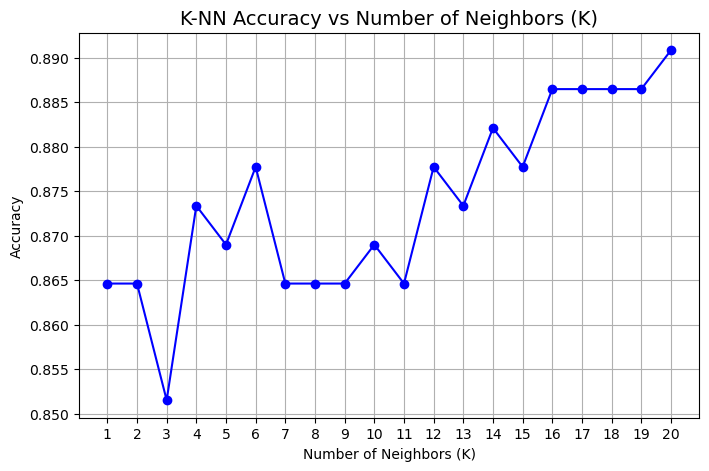

In [11]:
#Plot Accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('K-NN Accuracy vs Number of Neighbors (K)', fontsize=14)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [12]:
#Choose the best K (highest accuracy)
best_k = k_values[np.argmax(accuracies)]
print(f"Best K = {best_k} with Accuracy = {max(accuracies):.4f}")

Best K = 20 with Accuracy = 0.8908


In [13]:
#Retrain using best K and print metrics
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

y_pred = knn_best.predict(X_test)
y_prob = knn_best.predict_proba(X_test)[:, 1]

In [14]:
# Confusion matrix and metrics
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy
recall = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("\n===== Final Model Evaluation =====")
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Error: {error:.4f}")
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")



===== Final Model Evaluation =====
Confusion Matrix:
 [[194   3]
 [ 22  10]]
Accuracy: 0.8908
Error: 0.1092
TP: 10, TN: 194, FP: 3, FN: 22
Recall (Sensitivity): 0.3125
Specificity: 0.9848
F1 Score: 0.4444
AUC: 0.8355


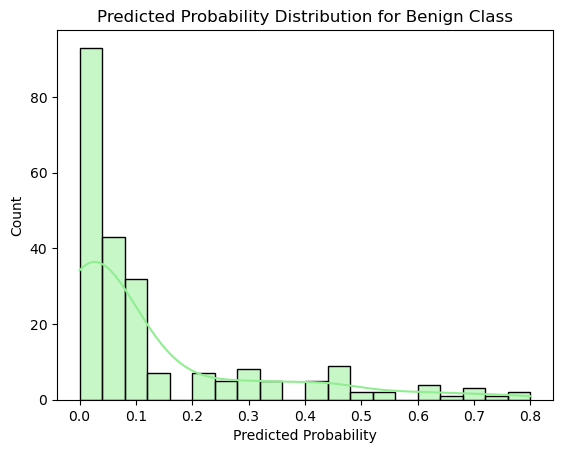

In [15]:
# Plot probability distribution
sns.histplot(y_prob, bins=20, kde=True, color='lightgreen')
plt.title('Predicted Probability Distribution for Benign Class')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.show()

In [16]:
# Visualizing KNN Clusters (Decision Boundary)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [17]:
# Load and scale the Breast Cancer dataset
bc = load_breast_cancer()
X = bc.data
y = bc.target  # 0 = malignant, 1 = benign

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [20]:
# Create a meshgrid for plotting decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

In [21]:
# Predict class for each point in mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

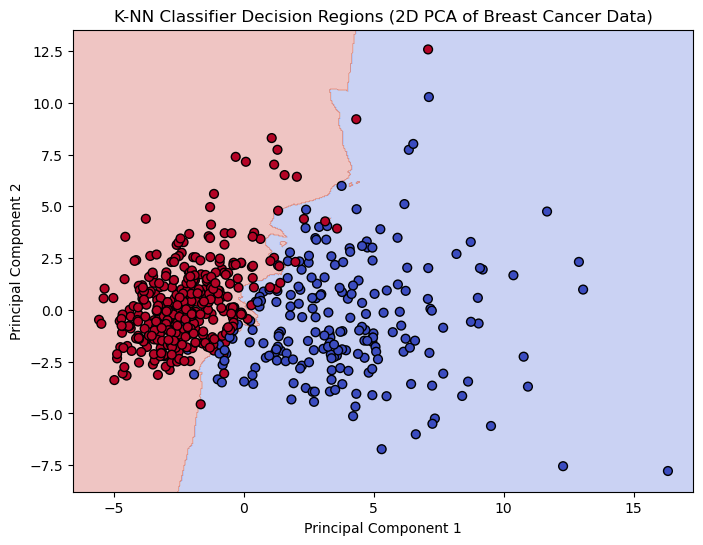

In [22]:
# Plot decision boundary + training points
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=40)
plt.title('K-NN Classifier Decision Regions (2D PCA of Breast Cancer Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
